In [2]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
import helper
from numpy.linalg import inv
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.linalg import cholesky, det
from scipy.linalg import solve_triangular


/var/folders/n4/k97yk30s1wn32d7y6729kph80000gn/T/ipykernel_8447/4243551668.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(wav_file)


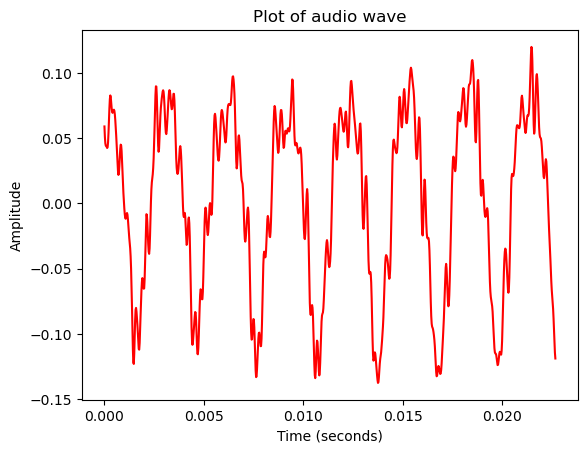

In [3]:
# Set up wav file as data
# Training data
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/piano_E4_330.wav'
sample_rate, data = wav.read(wav_file)
data = data[4000:5000]

# data = data[4600:6600]

audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

2it [00:01,  1.18it/s]


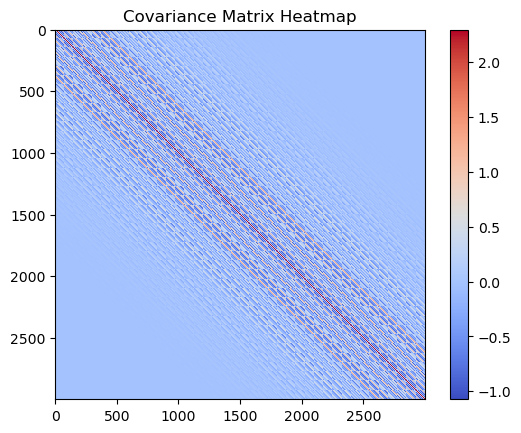

0.0


In [32]:

### Purely just experimenting with SM_kernel 
sample_rate = 44100
sample_len = 3000
audio_duration = sample_len/sample_rate
x = np.linspace(0, sample_rate, sample_len)

K = helper.SM_kernel(x,x, f=[220, 758], sigma_f=1/50000)
helper.plot_kernel_matrix(K)
print(np.linalg.det(K))

####################
# Learnings
# Even with huge

In [37]:
def relative_nlml1(time_samples, Y,  M=15, sigma_f=1/500000, f=[440], sigma_n=1e-2, B=None, T=2, v=5, amplitude=None, normalised=True):
    """
    This uses the stable implementation as written in stable_nlml. (see above)
    After exploring the effects of the separate terms, it was decided to 
    stick to using only the `data fit' term since this is the one which is 
    not affected by change in Q. 
    This is a unique problem for this application of GP models,
    as in this case, there should be no added complexity from more notes (Q) 
    """
    Y = Y.ravel()
    if normalised is True:
        Y = Y/sum(abs(Y))
    K = helper.SM_kernel(time_samples, time_samples, M=M, sigma_f=sigma_f, f=f, B=B, T=T, v=v, amplitude=amplitude) + \
        sigma_n**2 * np.eye(len(time_samples))

    L = cholesky(K)
    S1 = solve_triangular(L, Y, lower=True)
    S2 = solve_triangular(L.T, S1, lower=False)

    return np.sum(np.log(np.diagonal(L)))


In [48]:

# G diminished is f = [196, 233, 277, 330]
f = [330]
sigma_f =1/50000
M = 9

print(-helper.relative_nlml(time_samples, data, f=f, sigma_f=sigma_f, M=M, normalised=True, amplitude=None ))
print(-helper.relative_nlml(time_samples, data,  f=f, sigma_f=sigma_f, M=M, normalised=True, amplitude=None))
print(-helper.relative_nlml(time_samples, data,  f=f, sigma_f=sigma_f, M=M, normalised=True, amplitude=None))


1it [00:00,  3.41it/s]
0it [00:00, ?it/s]

-0.09634502019547178


1it [00:00,  3.31it/s]
0it [00:00, ?it/s]

-0.09634502019547178


1it [00:00,  3.86it/s]

-0.09634502019547178


In [14]:
T=0.467
v=2.37
M=8
sigma_f= 1/50000



true = np.exp(-helper.relative_nlml(time_samples, data, f=[330], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None ))
print(true)
print(np.exp(-helper.relative_nlml(time_samples, data, f=[330/2], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None )))
print(np.exp(-helper.relative_nlml(time_samples, data, f=[335], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None )))

many_notes = np.exp(-helper.relative_nlml(time_samples, data, f=[234,330, 9643], sigma_f=sigma_f, M=M,T=T, v=v, normalised=True, amplitude=None ))
print(many_notes)
print("\n true - many notes = ", true - many_notes)

1it [00:00, 15.17it/s]
1it [00:00, 18.74it/s]
1it [00:00, 18.34it/s]
0it [00:00, ?it/s]

0.7583819622896876
0.6806419614195754
0.4665143206873748


3it [00:00, 18.96it/s]


0.7622026777750043

 true - many notes =  -0.003820715485316706
